In [1]:
"""
==============
Non-linear SVM
==============
Perform binary classification using non-linear SVC
with RBF kernel. The target to predict is a XOR of the
inputs.
The color map illustrates the decision function learned by the SVC.
"""
print(__doc__)




Non-linear SVM
Perform binary classification using non-linear SVC
with RBF kernel. The target to predict is a XOR of the
inputs.
The color map illustrates the decision function learned by the SVC.



In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm


In [3]:

xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                     np.linspace(-3, 3, 500))
np.random.seed(0)
X = np.random.randn(300, 2)
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)


In [4]:
print(X.shape)
print(Y.shape)

(300, 2)
(300,)


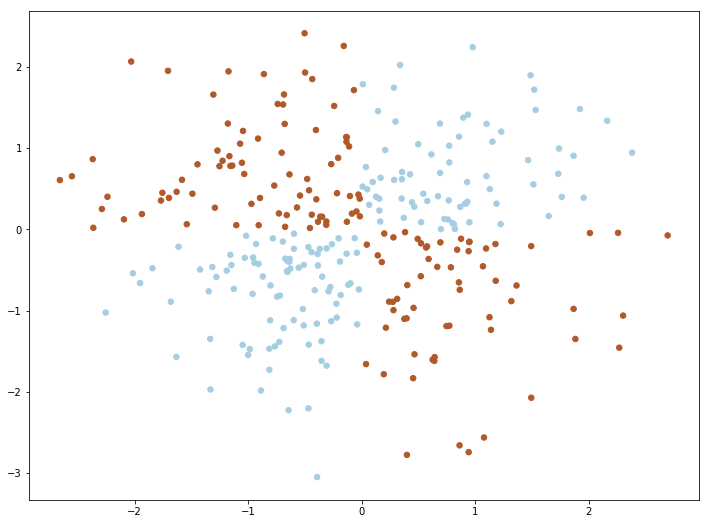

In [5]:
plt.figure(1, figsize=(12, 9))
plt.scatter(X[:, 0], X[:, 1], c=Y, s=30, cmap=plt.cm.Paired)
plt.show()

In [6]:
# fit the model
clf = svm.NuSVC()
clf.fit(X, Y)


/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


NuSVC(cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
   kernel='rbf', max_iter=-1, nu=0.5, probability=False, random_state=None,
   shrinking=True, tol=0.001, verbose=False)

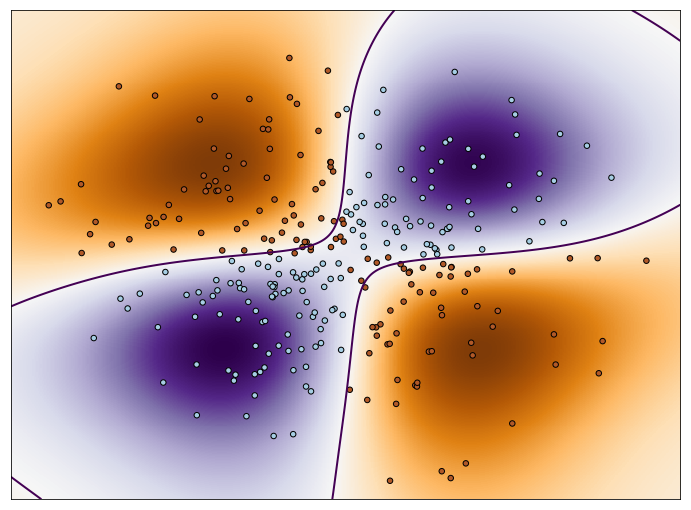

In [7]:


# plot the decision function for each datapoint on the grid
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(2, figsize=(12, 9))
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
           origin='lower', cmap=plt.cm.PuOr_r)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2)
plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired,
            edgecolors='k')
plt.xticks(())
plt.yticks(())
plt.axis([-3, 3, -3, 3])
plt.show()